# Chapter 2

In [1]:
import numpy as np
from numpy.random import normal
from numpy.linalg import inv
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, multivariate_normal

from utils import polynomial, generateData, getTarget, \
    getOptimalParams, MSEloss, std_dev, variance, \
    get_likelihood, LOOCV, predict, set_plot, plt_contourf

In [2]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5

### Figure 2.1

Observations (blue) and model generated data (orange) with no variance (a), more variance (b) and less variance (c) than the observations.

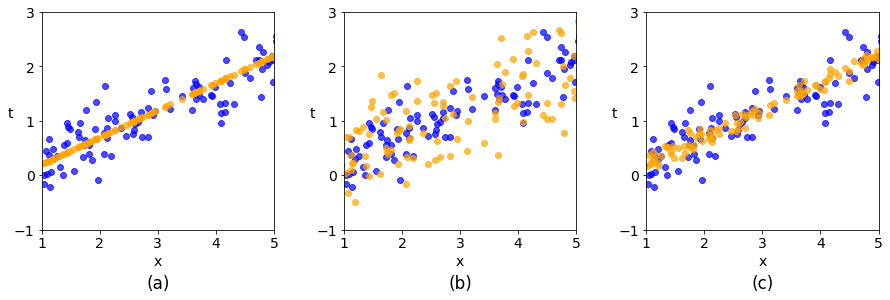

In [3]:
n_samples = 100
theta = [-0.3, 0.5]
noise = 0.3
x, t = generateData(theta, n_samples, noise_stddev=noise)
w = getOptimalParams(x, t, 1)
X = polynomial(x, 1)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].scatter(x, t, alpha=0.7, color='b', label="real noise data")
ax[0].scatter(x, X.dot(theta), alpha=0.7, color='orange', label="higher noise prediction")

ax[1].scatter(x, t, alpha=0.7, color='b', label="real noise data")
ax[1].scatter(x, X.dot(theta) + normal(0, 0.5, len(x)), alpha=0.7, color='orange', label="higher noise prediction")

ax[2].scatter(x, t, alpha=0.7, color='b', label="real noise data")
ax[2].scatter(x, X.dot(theta) + normal(0, 0.1, len(x)), alpha=0.7, color='orange', label="lower noise prediction")

set_plot(ax[0], [1, 5], [0, 3], range(1, 6), range(-1, 4), 'x', 't')
set_plot(ax[1], [1, 5], [0, 3], range(1, 6), range(-1, 4), 'x', 't')
set_plot(ax[2], [1, 5], [0, 3], range(1, 6), range(-1, 4), 'x', 't')

ax[0].set_title('(a)', y=-0.3)
ax[1].set_title('(b)', y=-0.3)
ax[2].set_title('(c)', y=-0.3)

plt.subplots_adjust(wspace=0.3)
plt.show()

### Figure 2.2

Polynomials of $1^{st}$ (green), $2^{nd}$ (orange) and $3^{rd}$ (magenta) order fitting artificially generated data (left) and likelihood of the red data point for the three different models (right).

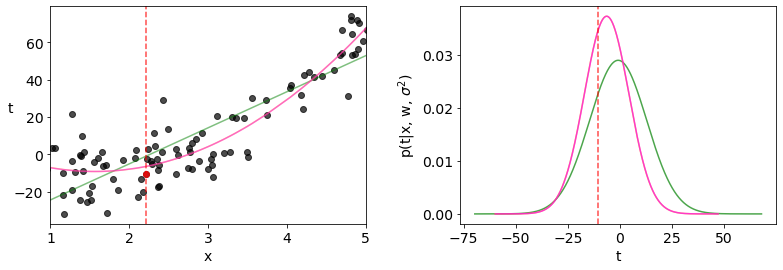

In [4]:
n_samples = 100
theta = [-9, 0, -2, 1]
noise = 10
x, t = generateData(theta, n_samples, noise_stddev=noise)
colors = ['green', 'orange', 'magenta']

loss = []
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].scatter(x, t, color='black', alpha=0.7)
selected=34
for i in range(3):
    w = getOptimalParams(x, t, i + 1)
    t_reg = getTarget(w, x)

    x_n = x[selected]
    t_n = t[selected]
    X_n = np.array([x_n**n for n in range(len(w))])
    mean = X_n.dot(w)
    standard_deviation = std_dev(x, t, w)
    xrange = np.arange(mean-5*standard_deviation, (mean+5*standard_deviation), 0.001)
    
    ax[0].plot(x, t_reg, alpha=0.5, color=colors[i], label="pol. deg. {} - likelihood: {:.2}".format(i, get_likelihood(x, t, w)))
    
    ax[1].plot(xrange, 
               norm.pdf(xrange, mean, standard_deviation), 
               color=colors[i], alpha=0.7)

ax[0].scatter(x[selected], t[selected], color='r', alpha=0.7)    
ax[0].axvline(x=x_n, color='r', ls='--', alpha=0.7)
ax[1].axvline(x=t_n, color='r', ls='--', alpha=0.7)

ax[0].set_xlim(1, 5)
ax[0].set_xticks(range(1, 6))

ax[0].set_xlabel('x')
ax[0].set_ylabel('t', rotation=0)
ax[1].set_xlabel('t')
ax[1].set_ylabel('p(t|x, w, $\sigma^2$)', rotation=90)

plt.subplots_adjust(wspace=0.3)

plt.show()

### Figure 2.3

Theoretical expected value of the variance (solid lines) and expected value computed by averaging over 100 samples (dashed lines), for different number of observations, for polynomials of $1^{st}$ (green), $2^{nd}$ (orange) and $3^{rd}$ (magenta) degree. The dashed black line corresponds to the real value of the variance used to generate the observations.

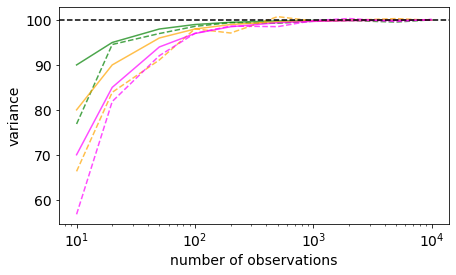

In [5]:
N = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
theta = [0.5, 1]
noise = 10
colors = ['green', 'orange', 'magenta']

_, ax = plt.subplots(figsize=(7, 4))
for i in range(3):
    variances = []
    for n in N:
        expected_variance = 0
        for _ in range(100):
            x, t = generateData(theta, n, noise_stddev=noise)
            expected_variance += variance(x, t, getOptimalParams(x, t, i+1))
        variances.append(expected_variance/100)

    ax.semilogx(N, variances, '--', color=colors[i], alpha=0.7)
    ax.semilogx(N, [(noise**2)*(1-float(i+1)/n) for n in N], color=colors[i], alpha=0.7)

ax.axhline(noise**2, linestyle='--', color='black')
ax.set_xlabel('number of observations')
ax.set_ylabel('variance')

plt.show()

### Figure 2.4

Polynomials of different orders fitting artificially generated data (left) and the corresponding negative log likelihood (right).

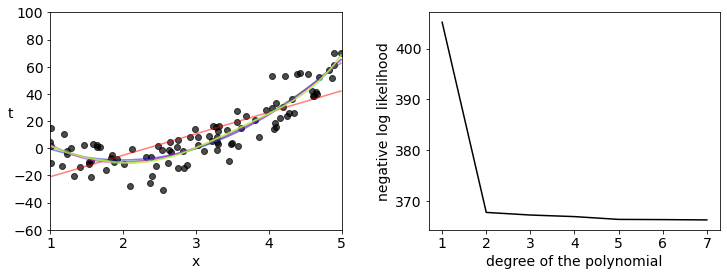

In [6]:
n_samples = 100
theta = [-9, 0, -2, 1]
noise = 10
x, t = generateData(theta, n_samples, noise_stddev=noise)

nll = []
degrees = np.arange(1, 8)
colors = ['red', 'blue', 'green', 'magenta', 'orange', 'cyan', 'yellow']
_, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(x, t, alpha=0.7, color='black')

for i, d in enumerate(degrees):
    w = getOptimalParams(x, t, d)
    t_reg = getTarget(w, x)
    nll.append(-np.log(get_likelihood(x, t, w)))
    ax[0].plot(x, t_reg, color=colors[i], alpha=0.5)

ax[1].plot(degrees, nll, color='black')
ax[1].set_xticks(range(1, 8))

set_plot(ax[0], [1, 5], [-60, 100], range(1, 6), range(-60, 120, 20), 'x', 't')
ax[1].set_ylabel('negative log likelihood', rotation=90)
ax[1].set_xlabel('degree of the polynomial')

plt.subplots_adjust(wspace=0.3)
plt.show()

### Figure 2.5

Polynomials of different orders fitting training data in black (left) and the corresponding negative log likelihood (center) and mean squared error calculated on the test data in white (right).

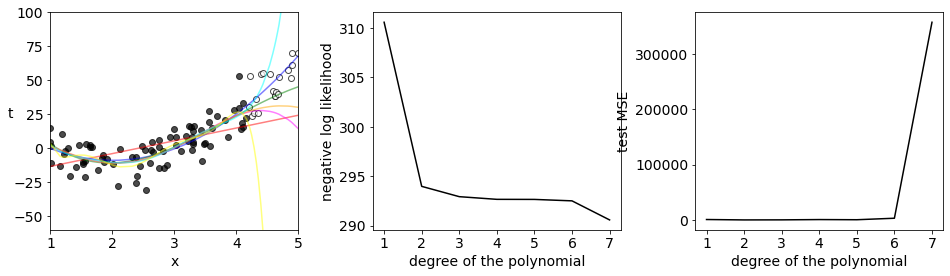

In [7]:
n_train = int(0.8 * n_samples)

x_train = x[:n_train]
t_train = t[:n_train]
x_test = x[n_train:]
t_test = t[n_train:]

loss = []
nll = []
degrees = np.arange(1, 8)
colors = ['red', 'blue', 'green', 'magenta', 'orange', 'cyan', 'yellow']

_, ax = plt.subplots(1, 3, figsize=(16, 4))

for i, d in enumerate(degrees):
    w = getOptimalParams(x_train, t_train, d)
    t_reg = getTarget(w, x)
    nll.append(-np.log(get_likelihood(x_train, t_train, w)))
    loss.append(MSEloss(x_test, t_test, w))
    ax[0].plot(x, t_reg, color=colors[i], alpha=0.5)  
    
ax[0].scatter(x_train, t_train, alpha=0.7, c='black')
ax[0].scatter(x_test, t_test, alpha=0.7, c='white', edgecolors='black')

ax[0].set_xlim(1, 5)
ax[0].set_ylim(-60, 100)
ax[0].set_xticks(range(1, 6))
ax[0].set_xlabel('x')
ax[0].set_ylabel('t', rotation=0)

ax[1].plot(degrees, nll, color='black')

ax[1].set_ylabel('negative log likelihood', rotation=90)
ax[1].set_xlabel('degree of the polynomial')
ax[1].set_xticks(range(1, 8))

ax[2].plot(degrees, loss, color='black')
ax[2].set_xticks(range(1, 8))

ax[2].set_xlabel('degree of the polynomial')
ax[2].set_ylabel('test MSE')


plt.subplots_adjust(wspace=0.3)
plt.show()

### Figure 2.6

Predictive variance for polynomials of $2^{nd}$, $3^{rd}$ and $5^{th}$ order respectively. The black line corresponds to the model used to generate the data.

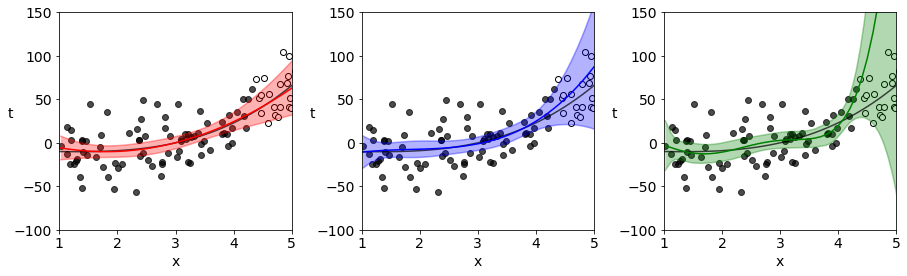

In [8]:
n_samples = 100
theta = [-9, 0, -2, 1]
noise = 20
x, t = generateData(theta, n_samples, noise_stddev=noise)

y = getTarget(theta, np.arange(1, 5.1, 0.1))

n_train = int(0.8 * n_samples)
x_test = np.array(x[n_train:])
t_test = np.array(t[n_train:])
x_train = x[:n_train]
t_train = t[:n_train]

_, ax = plt.subplots(1, 3, figsize=(15, 4))

degrees = [2, 3, 5]
for i in range(3):

    w = getOptimalParams(x_train, t_train, degrees[i])
    t_reg = getTarget(w, np.arange(1, 5.1, 0.1))
    
    ax[i].scatter(x_train, t_train, c='black', alpha=0.7)
    ax[i].scatter(x_test, t_test, c='white', edgecolors='black')
    ax[i].plot(np.arange(1, 5.1, 0.1), y, color='black', alpha=0.7)
    ax[i].plot(np.arange(1, 5.1, 0.1), t_reg, color=colors[i], alpha=1)
    
    conf = []

    for x_new in x_train:
        X_new = polynomial(x_new, len(w)-1).reshape(-1)
        conf.append(predict(X_new, x_train, t_train, w))

    for x_new in x_test:
        X_new = polynomial(x_new, len(w)-1).reshape(-1)
        conf.append(predict(X_new, x_train, t_train, w))

    up = [e[0] + 2*e[1] for e in conf]
    down = [e[0] - 2*e[1] for e in conf]
    ax[i].plot(x, up, alpha=0.35, c=colors[i])
    ax[i].plot(x, down, alpha=0.35, c=colors[i])
    ax[i].fill_between(x, np.array(up).reshape(-1), np.array(down).reshape(-1), facecolor=colors[i], alpha=0.3)


    ax[i].set_xlim(1, 5)
    ax[i].set_ylim(-100, 150)
    ax[i].set_xticks(range(1, 6))
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('t', rotation=0)

plt.subplots_adjust(wspace=0.3)
plt.show()

### Figure 2.7

Polynomials of different orders fitting artificially generated data (left) and corresponding negative log likelihood (center) and LOOCV error (right).

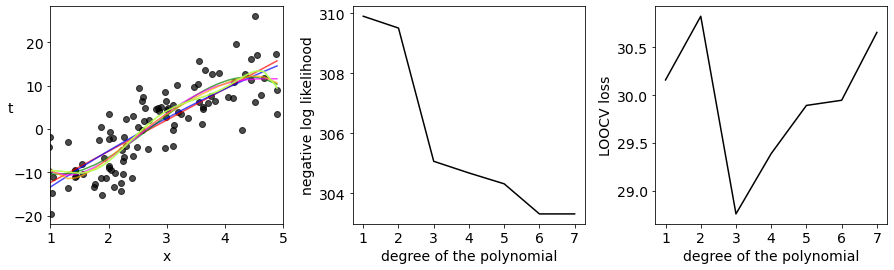

In [9]:
n_samples = 100
theta = [-6, -12, 8, -1]
noise = 5
x, t = generateData(theta, n_samples, noise_stddev=noise)

loss = []
nll = []
degrees = np.arange(1, 8)
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, d in enumerate(degrees):
    w = getOptimalParams(x, t, d)
    t_reg = getTarget(w, x)
    ax[0].plot(x, t_reg, c=colors[i], alpha=0.7)
    
    loss.append(LOOCV(x, t, d))
    nll.append(-np.log(get_likelihood(x, t, w)))
    

ax[0].scatter(x, t, alpha=0.7, color='black')
ax[0].set_xlim(1, 5)
ax[0].set_xticks(range(1, 6))
ax[0].set_xlabel('x')
ax[0].set_ylabel('t', rotation=0)
ax[1].set_xlabel('degree of the polynomial')
ax[1].set_ylabel('negative log likelihood')
ax[1].set_xticks(range(1, 8))
ax[2].set_xlabel('degree of the polynomial')
ax[2].set_ylabel('LOOCV loss')
ax[2].set_xticks(range(1, 8))

ax[1].plot(degrees, nll, color='black')
ax[2].plot(degrees, loss, color='black')


plt.subplots_adjust(wspace=0.3)
plt.show()

### Figure 2.8

Density of the model parameters (left) and prediction of the value on the red dahsed line using three models with different parameters (right). Each model corresponds to a sample from the prameters distribution.

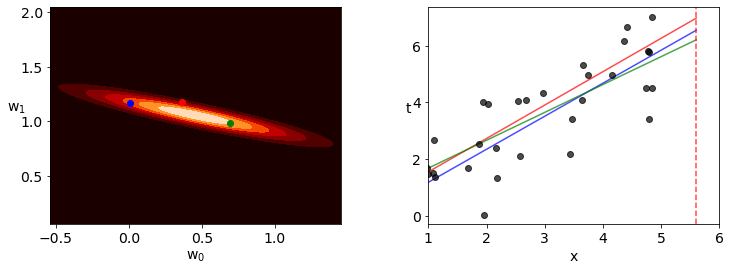

In [10]:
theta = [0.5, 1]
noise = 1

# plot posterior
prior_mean = [0, 0]
s = 10
prior_cov = s*np.identity(len(theta))
t_reg = getTarget(theta, np.arange(1, 5.1, 0.1))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
n_samples = 30
x, t = generateData(theta, n_samples, noise_stddev=noise)
w = getOptimalParams(x, t, len(theta)-1)

X = polynomial(x, len(w)-1)
var = variance(x, t, w)


post_cov = inv(inv(prior_cov) + X.T.dot(X)/var)
post_mean = post_cov.dot(inv(prior_cov).dot(prior_mean) + (X.T.dot(t))/var)
posterior = multivariate_normal(mean=post_mean, cov=post_cov)

plt_contourf(posterior, post_mean, ax[0], size=1)
ax[0].set_xlabel('w$_0$')
ax[0].set_ylabel('w$_1$', rotation=0)

x_new = 5.6

# plot lines for different w
for i in range(3):
    sample_w = posterior.rvs()
    y_reg = getTarget(sample_w, np.arange(1, x_new+0.1, 0.1))
    ax[0].scatter(sample_w[0], sample_w[1], color=colors[i])
    ax[1].plot(np.arange(1, x_new+0.1, 0.1), y_reg, alpha=0.7, c=colors[i])

    
#ax[1].plot(np.arange(1, 5.1, 0.1), t_reg, '--', color='red')
ax[1].axvline(x_new, linestyle='--', color='red', alpha=0.7)
ax[1].scatter(x, t, alpha=0.7, color='black', zorder=100)
ax[1].set_xlim(1, 6)
#ax[1].set_ylim(-10, 2)
#ax[0].set_xlim(0.5, 1.5)
#ax[0].set_ylim(0, 2)
ax[1].set_xticks(range(1, 7))
ax[1].set_xlabel('x')
ax[1].set_ylabel('t', rotation=0)

plt.subplots_adjust(wspace=0.3)
plt.show()

### Figure 2.9

The first column illustrates the posterior distribution and the original model (white cross) as the model sees more data points. The second column shows the original model (dashed line), 30 models obtained by sampling parameters from the posterior in the first column, and the data points used to compute the posterior, respectively 1, 3, 10 and 100. The third column displays the Bayesian model with uncertainty boundaries corresponding to 2 standard deviations, and the original model.

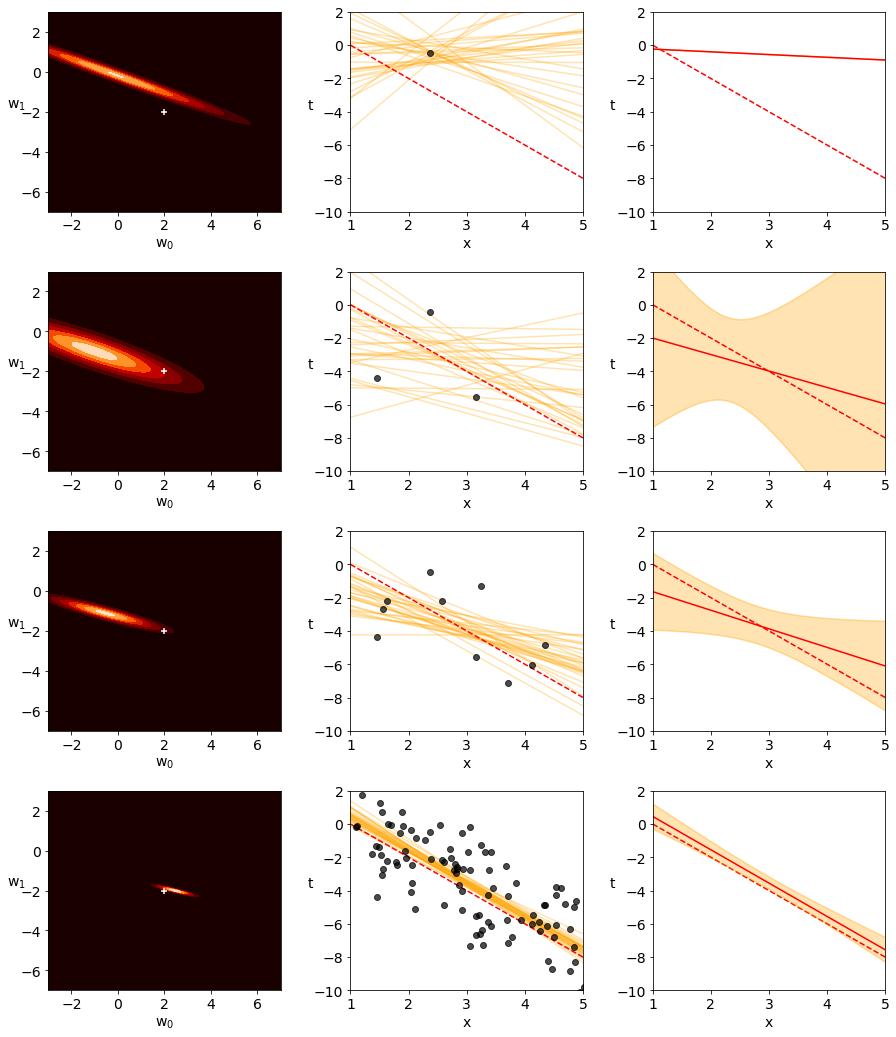

In [11]:
theta = [2, -2]
noise = 2

# plot posterior
prior_mean = [0, 0]
s = 10
prior_cov = s*np.identity(len(theta))
t_reg = getTarget(theta, np.arange(1, 5.1, 0.1))

fig, ax = plt.subplots(4, 3, figsize=(15, 18))
data = generateData(theta, 100, noise_stddev=noise)
np.random.shuffle(data.T)
x_tot, t_tot = data
n_points = [1, 3, 10, 100]
for i, n_samples in enumerate(n_points):
    
    x, t = x_tot[:n_samples], t_tot[:n_samples]
    w = getOptimalParams(x, t, len(theta)-1)
    
    X = polynomial(x, len(w)-1)
    var = variance(x, t, w)
    
    
    post_cov = inv(inv(prior_cov) + X.T.dot(X)/var)
    post_mean = post_cov.dot(inv(prior_cov).dot(prior_mean) + (X.T.dot(t))/var)
    posterior = multivariate_normal(mean=post_mean, cov=post_cov)
    
    plt_contourf(posterior, theta, ax[i][0])
    ax[i][0].scatter(theta[0], theta[1], c='white', marker='+')
    ax[i][0].set_xlabel('w$_0$')
    ax[i][0].set_ylabel('w$_1$', rotation=0)
    ax[i][0].set_xlim(-3, 7)
    ax[i][0].set_ylim(-7, 3)

    # plot lines for different w
    for _ in range(30):
        sample_w = posterior.rvs()
        y_reg = getTarget(sample_w, np.arange(1, 5.1, 0.1))
        ax[i][1].plot(np.arange(1, 5.1, 0.1), y_reg, alpha=0.3, c='orange')

    ax[i][1].plot(np.arange(1, 5.1, 0.1), t_reg, '--', color='red')
    ax[i][1].scatter(x, t, alpha=0.7, color='black', zorder=100)
    ax[i][1].set_xlim(1, 5)
    ax[i][1].set_ylim(-10, 2)
    ax[i][1].set_xticks(range(1, 6))
    ax[i][1].set_xlabel('x')
    ax[i][1].set_ylabel('t', rotation=0)

    # plot stddev lines
    conf = []  
        
    if i ==0:
        for x_new in np.arange(1, 5.1, 0.1):
            X_new = np.array([x_new**(e) for e in range(len(w))])
            t_new = post_mean.T.dot(X_new)
            X = polynomial(x, len(list(w))-1).reshape(-1)
            tmp = t - X.dot(post_mean)
            var_new = (tmp**2) * X_new.T.dot(X_new)/X.T.dot(X)
            conf.append([t_new, np.sqrt(var_new)])
    else:
        for x_new in np.arange(1, 5.1, 0.1):
            X_new = polynomial(x_new, len(theta)-1).reshape(-1)
            conf.append(predict(X_new, x, t, post_mean))
            
    up = np.array([e[0] + 2*e[1] for e in conf]).reshape(-1)
    down = np.array([e[0] - 2*e[1] for e in conf]).reshape(-1)
    ax[i][2].plot(np.arange(1, 5.1, 0.1), t_reg, '--', color='red')
    ax[i][2].plot(np.arange(1, 5.1, 0.1), up, alpha=0.35, c='orange')
    ax[i][2].plot(np.arange(1, 5.1, 0.1), down, alpha=0.35, c='orange')
    ax[i][2].fill_between(np.arange(1, 5.1, 0.1), up, down, facecolor='orange', alpha=0.3)
    
    
    ax[i][2].plot(np.arange(1, 5.1, 0.1), getTarget(post_mean, np.arange(1, 5.1, 0.1)), c='red')
    ax[i][2].set_xlim(1, 5)
    ax[i][2].set_ylim(-10, 2)
    ax[i][2].set_xticks(range(1, 6))
    ax[i][2].set_xlabel('x')
    ax[i][2].set_ylabel('t', rotation=0)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

### Figure 2.10

Laplace approximation for a bimodal distribution (left) and a gamma distribution (right).

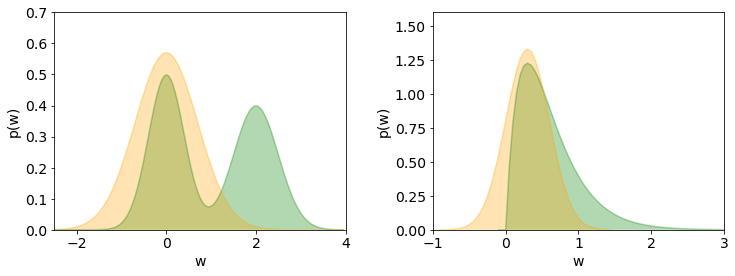

In [12]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

mean1 = 0
std1 = 0.4
mean2 = 2
std2 = 0.5
mean3 = 0
std3 = 0.7

x = np.arange(-2.5, 4, 0.05)
y = (norm.pdf(x,mean1,std1) + norm.pdf(x,mean2,std2))/2
ax[0].plot(x, y, color='green', alpha=0.3)
ax[0].fill_between(x, np.zeros(len(x)), y, facecolor='green', alpha=0.3)
y = norm.pdf(x,mean3,std3)
ax[0].plot(x, y, color='orange', alpha=0.3)
ax[0].fill_between(x, np.zeros(len(x)), y, facecolor='orange', alpha=0.3)
ax[0].set_xlabel('w')
ax[0].set_ylabel('p(w)')
ax[0].set_xlim(-2.5, 4)
ax[0].set_ylim(0, 0.7)


mean = 0.3
std = 0.3
x = np.arange(-0.1, 4, 0.05)
y = gamma.pdf(x, 2, scale=0.3)
ax[1].plot(x, y, color='green', alpha=0.3)
ax[1].fill_between(x, np.zeros(len(x)), y, facecolor='green', alpha=0.3)
x = np.arange(mean-4*std, mean+4*std, 0.05)
y = norm.pdf(x,mean,std)
ax[1].plot(x, y, color='orange', alpha=0.3)
ax[1].fill_between(x, np.zeros(len(x)), y, facecolor='orange', alpha=0.3)
ax[1].set_xlabel('w')
ax[1].set_ylabel('p(w)')
ax[1].set_xlim(-1, 3)
ax[1].set_ylim(0, 1.6)

plt.subplots_adjust(wspace=0.3)
plt.show()

### Figure 2.11

Multimodal distribution with close modes (left) and isolated modes (right) and samples obtained using MCMC methods.

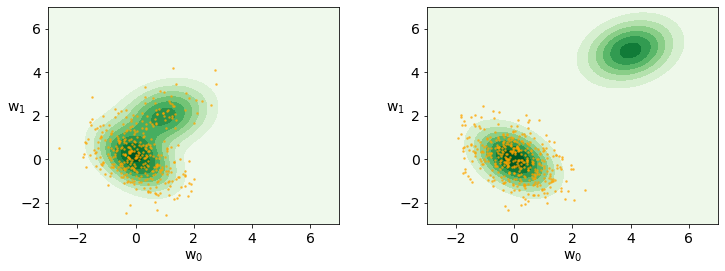

In [13]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

size = 5
w = [2, 2.5]
mean1 = [0, 0]
mean2 = [1, 2]
cov1 = [[0.7, -0.3], [-0.3, 0.8]]
cov2 = [[0.9, 0.2], [0.2, 0.8]]

x, y = np.mgrid[-3:7:.005, -3:7:.005]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
z = (multivariate_normal.pdf(pos, mean1, cov1) + multivariate_normal.pdf(pos, mean2, cov2))/2
ax[0].contourf(x, y, z, 8, cmap=plt.get_cmap('Greens'))#matplotlib.cm.winter)
for _ in range(300):
    x, y = multivariate_normal.rvs(mean1, cov1)
    ax[0].scatter(x, y, color='orange', alpha=0.6, s=2.5)
for _ in range(70):
    x, y = multivariate_normal.rvs(mean2, cov2)
    ax[0].scatter(x, y, color='orange', alpha=0.6, s=2.5)
ax[0].set_xlabel('w$_0$')
ax[0].set_ylabel('w$_1$', rotation=0)
ax[0].set_xlim(-3, 7)
ax[0].set_ylim(-3, 7)

size = 5
w = [2, 2.5]
mean1 = [0, 0]
mean2 = [4, 5]
cov1 = [[0.7, -0.3], [-0.3, 0.8]]
cov2 = [[0.9, 0.2], [0.2, 0.8]]

x, y = np.mgrid[-3:7:.005, -3:7:.005]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
z = (multivariate_normal.pdf(pos, mean1, cov1) + multivariate_normal.pdf(pos, mean2, cov2))/2
ax[1].contourf(x, y, z, 8, cmap=plt.get_cmap('Greens'))#matplotlib.cm.winter)

for _ in range(400):
    x, y = multivariate_normal.rvs(mean1, cov1)
    ax[1].scatter(x, y, color='orange', alpha=0.6, s=2.5)

ax[1].set_xlabel('w$_0$')
ax[1].set_ylabel('w$_1$', rotation=0)
ax[1].set_xlim(-3, 7)
ax[1].set_ylim(-3, 7)

plt.subplots_adjust(wspace=0.3)
plt.show()